# $\xi_{\rm mm}$ emulator

This notebook is used to create a figure for McClintock et al. (2019), which presents an emulator for the halo bias. This figure teases the $\xi_{\rm mm}$ emulator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ximm_emulator import *
import aemulus_data as AD
%matplotlib inline

In [2]:
plt.rc("font", size=16, family="serif")
plt.rc("errorbar", capsize=3)
plt.rc("text", usetex=True)

### A simple example of how to call the emulator

In [3]:
#Define a cosmology. This is an array that has
#Omega_b*h^2, Omega_cdm*h^2, w_0, n_s, ln(10^10 * A_s), H0, N_eff
cosmology = np.array([ 2.32629e-02, 1.07830e-01, -7.26513e-01, 9.80515e-01, 
                      3.03895e+00, 6.32317e+01, 2.95000e+00])
print("Cosmology for testing simulation 0 loaded")

Cosmology for testing simulation 0 loaded


In [4]:
#Make the emulator object
emu = ximm_emulator(cosmology)

CLASS is computing
	CLASS done


In [5]:
#Predict xi_mm.
#Note: the emulator outputs xi_mm at 10 redshifts.
#In the future you will be able to query the emulator for the curve at an arbitrary redshift.
xi_mm = emu.predict(cosmology) #Don't need to give the cosmology here, but just trying to be clear
#Note: the correlation function is at 50 specific radii between 0.1 and 75 Mpc/h.
radii = emu.get_radii()
redshifts = emu.get_redshifts()
print("Emulator prediction for xi_mm done")

Emulator prediction for xi_mm done


In [6]:
#Load in the measuremenst from simulation, stored in this reposity
datapath = "./data_for_plots/"
r_data = np.load(datapath+"ximm_r.npy")
xi_mm_data = np.load(datapath+"test_ximm_Box000.npy")
covs = np.load(datapath+"test_ximm_Box000_covs.npy")
print("xi_mm simulation measurements loaded")

xi_mm simulation measurements loaded


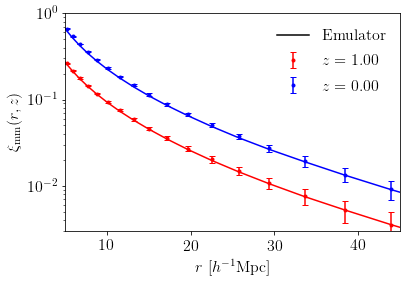

In [7]:
#Plot everything
c = ["r", "b"]
plt.xlim(5, 45)
for count, i in enumerate([2, 9]):
    plt.plot(radii, xi_mm[i], c=c[count])
    
    #Plot data
    errorbars = np.sqrt(covs[i].diagonal())
    plt.errorbar(r_data, xi_mm_data[i], errorbars, 
                 c=c[count], ls='', marker='.', label=r"$z=%.2f$"%redshifts[i],)
plt.plot([], [], c='k', label=r"Emulator")
plt.xlabel(r"$r\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\xi_{\rm mm}(r,z)$")
plt.yscale("log")
plt.ylim(3e-3, 1)
plt.legend(loc=0, frameon=False)#, fontsize=7)

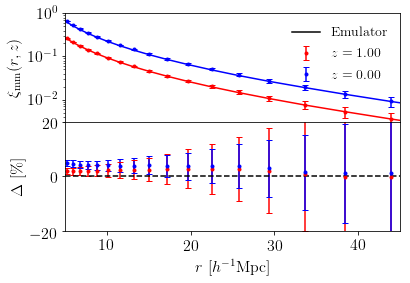

In [8]:
#A version with a residual on the bototm
c = ["r", "b"]
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
plt.subplots_adjust(hspace=0.00)
ax[0].set_xlim(5, 45)
for count, i in enumerate([2, 9]):
    ax[0].plot(radii, xi_mm[i], c=c[count])
    
    #Plot data
    errorbars = np.sqrt(covs[i].diagonal())
    ax[0].errorbar(r_data, xi_mm_data[i], errorbars,
                   c=c[count], ls='', marker='.', label=r"$z=%.2f$"%redshifts[i],)
    
    percentdiff = (xi_mm_data[i]-xi_mm[i])/xi_mm[i]*100
    pde = errorbars/xi_mm[i]*100
    ax[1].errorbar(r_data, percentdiff, pde,
                   c=c[count], ls='', marker='.')
ax[0].plot([], [], c='k', label=r"Emulator")
ax[1].set_xlabel(r"$r\ [h^{-1}{\rm Mpc}]$")
ax[0].set_ylabel(r"$\xi_{\rm mm}(r,z)$")
ax[1].set_ylabel(r"$\Delta\ [\%]$")
ax[0].set_yscale("log")
ax[0].set_ylim(3e-3, 1)
ax[1].axhline(0, c='k', ls='--')
yl = 20
ax[1].set_ylim(-yl, yl)
ax[0].legend(loc=0, frameon=False, fontsize=14)